In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [3]:
train

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0


In [4]:
test

,ID,timestamp,item,corporation,location
0,TG_A_J_20230304,2023-03-04,TG,A,J
1,TG_A_J_20230305,2023-03-05,TG,A,J
2,TG_A_J_20230306,2023-03-06,TG,A,J
3,TG_A_J_20230307,2023-03-07,TG,A,J
4,TG_A_J_20230308,2023-03-08,TG,A,J
...,...,...,...,...,...
1087,RD_F_J_20230327,2023-03-27,RD,F,J
1088,RD_F_J_20230328,2023-03-28,RD,F,J
1089,RD_F_J_20230329,2023-03-29,RD,F,J
1090,RD_F_J_20230330,2023-03-30,RD,F,J


In [5]:
train['timestamp']=pd.to_datetime(train['timestamp'])
test['timestamp']=pd.to_datetime(test['timestamp'])

In [6]:
train['year']=train['timestamp'].dt.year
train['month']=train['timestamp'].dt.month
train['day']=train['timestamp'].dt.day
train['weekday']=train['timestamp'].dt.weekday

test['year']=test['timestamp'].dt.year
test['month']=test['timestamp'].dt.month
test['day']=test['timestamp'].dt.day
test['weekday']=test['timestamp'].dt.weekday

# 요일 0 = monday, 6 = sunday
train['day_of_week'] = train['timestamp'].dt.dayofweek
test['day_of_week'] = test['timestamp'].dt.dayofweek

# 주말 여부
train['holiday'] = train.apply(lambda x : 0 if x['day_of_week'] < 5 else 1, axis = 1)
test['holiday'] = test.apply(lambda x : 0 if x['day_of_week'] < 5 else 1, axis = 1)

In [7]:
train=train.replace('TG','감귤')
train=train.replace('BC','브로콜리')
train=train.replace('RD','무')
train=train.replace('CR','당근')
train=train.replace('CB','양배추')

test=test.replace('TG','감귤')
test=test.replace('BC','브로콜리')
test=test.replace('RD','무')
test=test.replace('CR','당근')
test=test.replace('CB','양배추')

In [8]:
tg_idx = train[(train["item"]=="감귤") & (train["price(원/kg)"]>20000)].index
rd_idx = train[(train["item"]=="무") & (train["price(원/kg)"]>5000)].index
bc_idx = train[(train["item"]=="브로콜리") & (train["price(원/kg)"]>8000)].index
cb_idx = train[(train["item"]=="양배추") & (train["price(원/kg)"]>2300)].index

#이상치를 평균값으로 대체
train.loc[tg_idx,"price(원/kg)"] = train[(train["item"]=="감귤") & (train["price(원/kg)"]!=0)]["price(원/kg)"].mean()
train.loc[rd_idx,"price(원/kg)"] = train[(train["item"]=="무") & (train["price(원/kg)"]!=0)]["price(원/kg)"].mean()
train.loc[bc_idx,"price(원/kg)"] = train[(train["item"]=="브로콜리") & (train["price(원/kg)"]!=0)]["price(원/kg)"].mean()
train.loc[cb_idx,"price(원/kg)"] = train[(train["item"]=="양배추") & (train["price(원/kg)"]!=0)]["price(원/kg)"].mean()


In [9]:
#회사 별 판매 item의 수
train.groupby("corporation")["item"].unique()

corporation
A    [감귤, 당근, 양배추, 무, 브로콜리]
B            [감귤, 당근, 브로콜리]
C         [감귤, 당근, 무, 브로콜리]
D    [감귤, 당근, 양배추, 무, 브로콜리]
E    [감귤, 당근, 양배추, 무, 브로콜리]
F                  [양배추, 무]
Name: item, dtype: object

In [10]:
train.groupby("item")["price(원/kg)"].describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
감귤,15230.0,3176.341298,2801.568645,0.0,992.25,2273.5,5531.75,15123.0
당근,10661.0,273.118938,632.929933,0.0,0.00,0.0,0.00,3882.0
무,12184.0,186.650787,354.647516,0.0,0.00,0.0,383.00,4125.0
브로콜리,13707.0,909.759403,1420.658344,0.0,0.00,0.0,2032.50,7500.0
양배추,7615.0,150.552937,338.100744,0.0,0.00,0.0,0.00,2189.0


In [11]:
import seaborn as sns
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

In [12]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 4s (2,863 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and dire

In [13]:
plt.rc('font', family='NanumGothic')
sns.set(rc={'figure.figsize':(12, 5)})
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.size'] = 14

<Axes: xlabel='item', ylabel='price(원/kg)'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44516 (\N{HANGUL SYLLABLE GYUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from current font.
  func

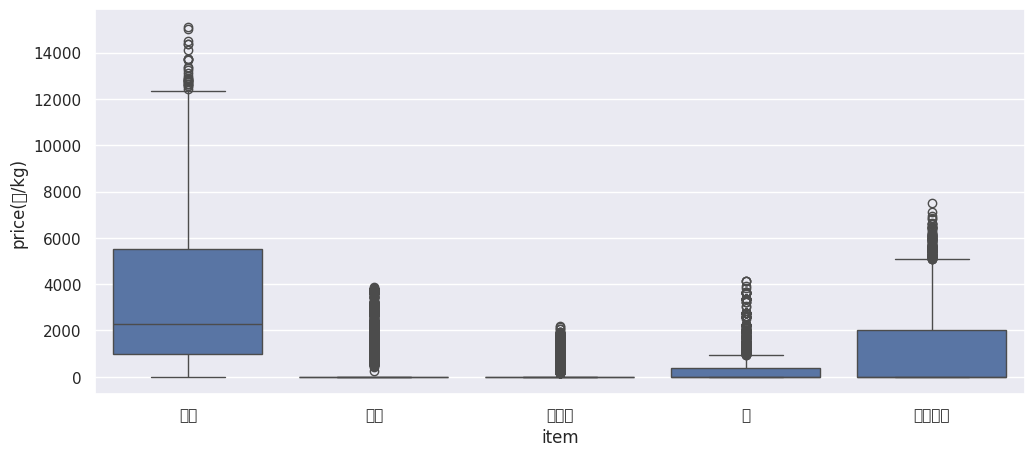

In [14]:
sns.boxplot(x='item',y='price(원/kg)',data=train)

<Axes: xlabel='corporation', ylabel='price(원/kg)'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


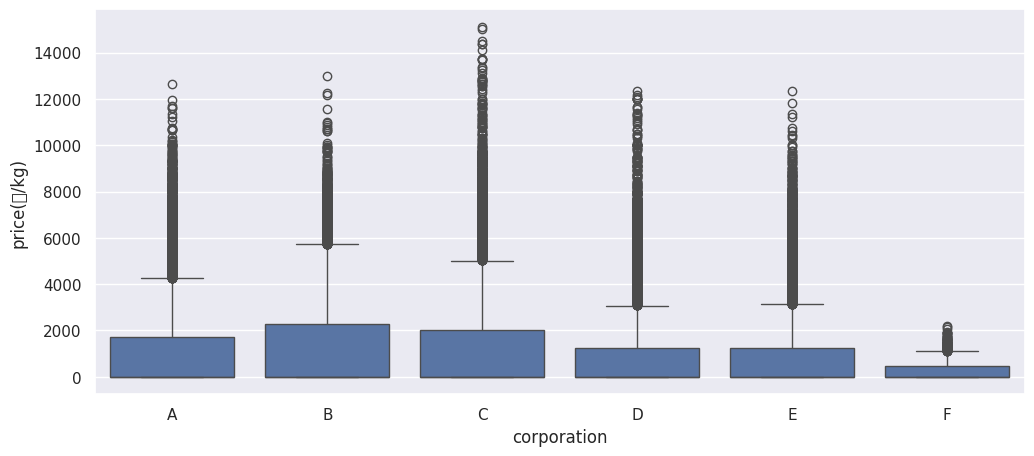

In [15]:
sns.boxplot(x='corporation',y='price(원/kg)',data=train)

<Axes: xlabel='location', ylabel='price(원/kg)'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


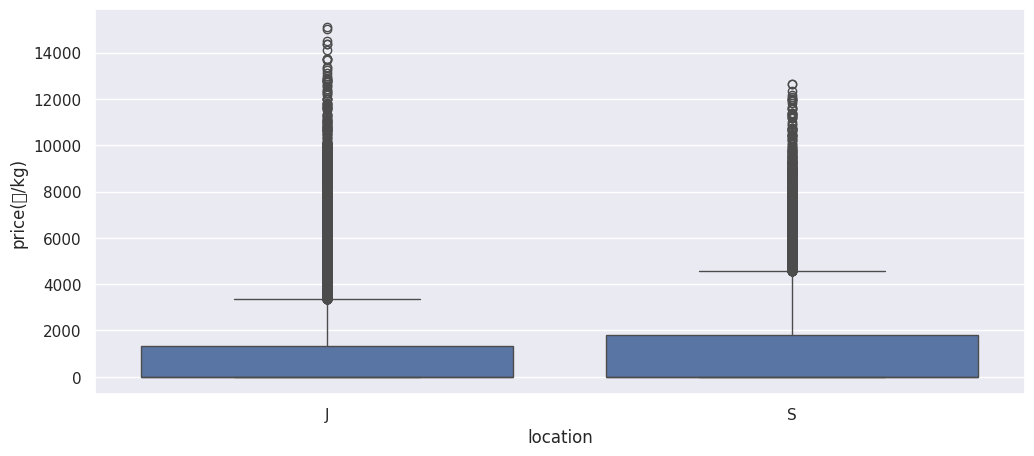

In [16]:
sns.boxplot(x='location',y='price(원/kg)',data=train)

<Axes: xlabel='year', ylabel='price(원/kg)'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


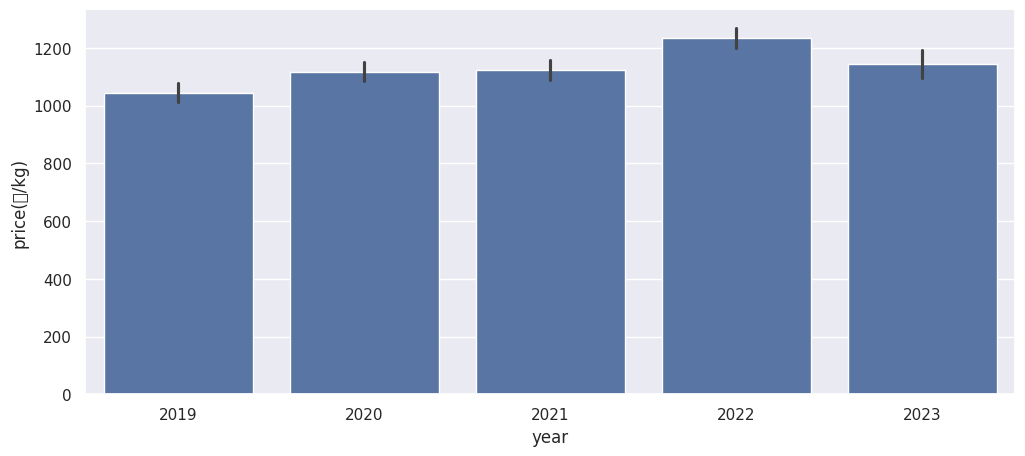

In [17]:
sns.barplot(data=train,x='year',y='price(원/kg)')

<Axes: xlabel='month', ylabel='price(원/kg)'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


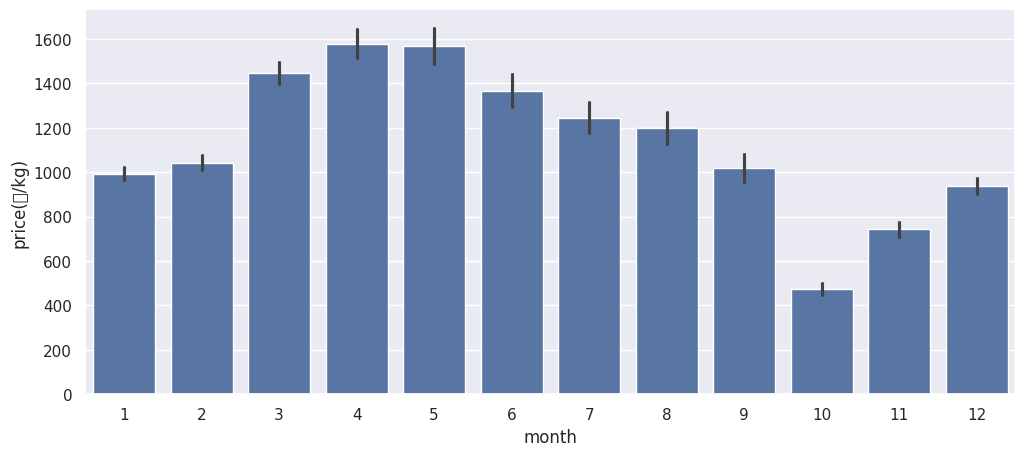

In [18]:
sns.barplot(data=train,x='month',y='price(원/kg)')

In [19]:
import random
import pandas as pd
import numpy as np
import os

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings(action='ignore')

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

categorical_features = ['item', 'corporation', 'location']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')

In [20]:
#일요일 중 price가 0이 아닌 날은 전체 일요일 중 0.25%
print(len(train[(train['price(원/kg)'] != 0) & (train['day_of_week'] == 6)]) * 100
      / len(train[train['day_of_week'] == 6]))

0.24813895781637718


In [21]:
#price가 0인 날이 그렇지 않은 날보다 많음
print(len(train[train['price(원/kg)'] != 0]) * 100 / len(train))
print(len(train[train['price(원/kg)'] == 0]) * 100 / len(train))

40.30843308584608
59.69156691415392


In [22]:
train=train.replace('감귤','TG')
train=train.replace('브로콜리','BC')
train=train.replace('무','RD')
train=train.replace('당근','CR')
train=train.replace('양배추','CB')

test=test.replace('감귤','TG')
test=test.replace('브로콜리','BC')
test=test.replace('무','RD')
test=test.replace('당근','CR')
test=test.replace('양배추','CB')

In [23]:
#질적 변수들을 수치화합니다
qual_col = ['item', 'corporation', 'location']

for i in qual_col:
    le = LabelEncoder()
    train[i]=le.fit_transform(train[i])
    test[i]=le.transform(test[i]) #test 데이터에 대해서 fit하는 것은 data leakage에 해당합니다

print('Done.')

Done.


In [24]:
test

,ID,timestamp,item,corporation,location,year,month,day,weekday,day_of_week,holiday
0,TG_A_J_20230304,2023-03-04,4,0,0,2023,3,4,5,5,1
1,TG_A_J_20230305,2023-03-05,4,0,0,2023,3,5,6,6,1
2,TG_A_J_20230306,2023-03-06,4,0,0,2023,3,6,0,0,0
3,TG_A_J_20230307,2023-03-07,4,0,0,2023,3,7,1,1,0
4,TG_A_J_20230308,2023-03-08,4,0,0,2023,3,8,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1087,RD_F_J_20230327,2023-03-27,3,5,0,2023,3,27,0,0,0
1088,RD_F_J_20230328,2023-03-28,3,5,0,2023,3,28,1,1,0
1089,RD_F_J_20230329,2023-03-29,3,5,0,2023,3,29,2,2,0
1090,RD_F_J_20230330,2023-03-30,3,5,0,2023,3,30,3,3,0


In [25]:
# prompt: prophet 설치

!pip install prophet


In [26]:
submission_df = pd.read_csv('sample_submission.csv')
prophet_data = train.rename(columns={'timestamp': 'ds', 'price(원/kg)': 'y'})
prophet_data = prophet_data[['ID', 'ds', 'y']]
prophet_data['ID'] = prophet_data['ID'].str.replace(r'_\d{8}$', '', regex=True)

In [27]:
from prophet import Prophet
import numpy as np
RANDOM_SEED = 990313
np.random.seed(RANDOM_SEED)
def ph_train(df):
    pred_list = []
    for code in df['ID'].unique():
        d = df[df['ID'] == code].reset_index().drop(['ID'], axis=1).sort_values('ds')
        model = Prophet()
        model.fit(d)
        future = pd.DataFrame()
        future['ds'] = pd.date_range(start='2023-03-04', periods=28, freq='D')
        forecast = model.predict(future)
        pred_y = forecast['yhat'].values
        pred_code = [str(code)] * len(pred_y)
        for y_val, id_val in zip(pred_y, pred_code):
            pred_list.append({'ID': id_val, 'y': y_val})
    pred = pd.DataFrame(pred_list)
    return pred
pred = ph_train(prophet_data)
submission_df['answer'] = pred['y']
submission_df.to_csv('prophet.csv',index=False)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0uqb3wvl/y2n7rq08.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0uqb3wvl/74jh_zlb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93776', 'data', 'file=/tmp/tmp0uqb3wvl/y2n7rq08.json', 'init=/tmp/tmp0uqb3wvl/74jh_zlb.json', 'output', 'file=/tmp/tmp0uqb3wvl/prophet_modele_mixjkp/prophet_model-20240522140131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:01:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:01:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0u

In [28]:
submission_df

,ID,answer
0,TG_A_J_20230304,3761.936426
1,TG_A_J_20230305,1229.904694
2,TG_A_J_20230306,4377.159202
3,TG_A_J_20230307,4299.322566
4,TG_A_J_20230308,4335.389414
...,...,...
1087,RD_F_J_20230327,409.107835
1088,RD_F_J_20230328,416.558523
1089,RD_F_J_20230329,406.792998
1090,RD_F_J_20230330,399.355576


In [29]:
train.to_csv('train1.csv', index=False)
test.to_csv('test1.csv', index=False)